<a href="https://colab.research.google.com/github/Miyazaki-Kohei/adhoc_analysis/blob/main/Web_Optimization_chapter2_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![表紙](https://www.oreilly.co.jp/books/images/picture978-4-87311-916-8.gif)

このノートブックはオライリー・ジャパンより発行の書籍[『ウェブ最適化ではじめる機械学習』（飯塚 修平　著）](https://www.oreilly.co.jp/books/9784873119168/)のサンプルコードです。コードの解説等は書籍をご参照ください。なお、このコードを動作させた結果について、著者およびオライリー・ジャパンは一切の責任を負いません。

# 2章: 確率的プログラミング: コンピュータの助けを借りる

必要なモジュールのインストール

In [1]:
!pip install -U pymc==4.1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.1/543.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: pymc
    Found existing installation: pymc 5.10.4
    Uninstalling pymc-5.10.4:
      Successfully uninstalled pymc-5.10.4


必要なモジュールの読み込み

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pymc as pm

plt.style.use('grayscale')
plt.style.use('seaborn-whitegrid')
np.random.seed(0)

<ipython-input-2-427f1aa11929>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 統計モデルの記述とサンプリングの実行

In [3]:
N = 40  # アリスのデザインA案の表示数
a = 2   # アリスのデザインA案のクリック数

with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1)
  # theta = pm.Beta('theta', alpha=1, beta=1)
  obs = pm.Binomial('a', p=theta, n=N, observed=a)
  trace = pm.sample(5000, chains=2)

`pm.plot_trace` による、事後分布からのサンプルの可視化

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


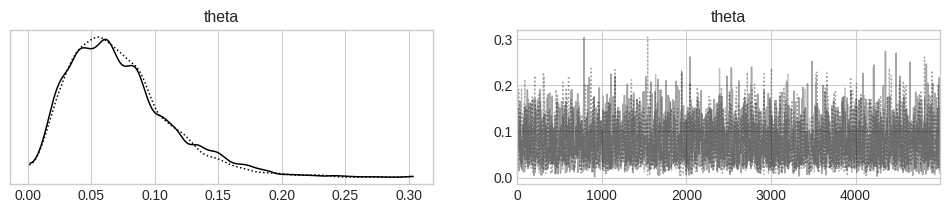

In [5]:
with model:
  pm.plot_trace(trace)

In [6]:
with model:
  print(pm.summary(trace, hdi_prob=0.95))

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


        mean    sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
theta  0.072  0.04     0.008      0.151      0.001      0.0    4653.0   

       ess_tail  r_hat  
theta    4384.0    1.0  


PyMC3によって推論された、アリスのデザインA案のクリック率の事後分布

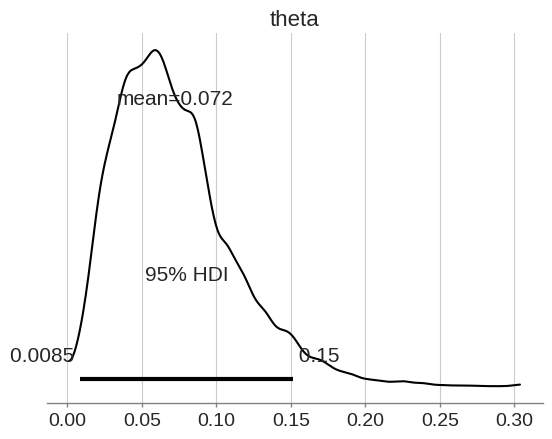

In [7]:
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)

In [8]:
# 旧
# print((trace['theta'] - 0.01 > 0).mean())

#新
print((trace.posterior['theta'].values - 0.01 > 0).mean())

0.9903


In [9]:
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
  obs = pm.Binomial('obs', p=theta, n=[40, 50], observed=[2, 4])
  trace = pm.sample(5000, chains=2)

アリスのデザイン案AおよびBのクリック率のサンプルの可視化

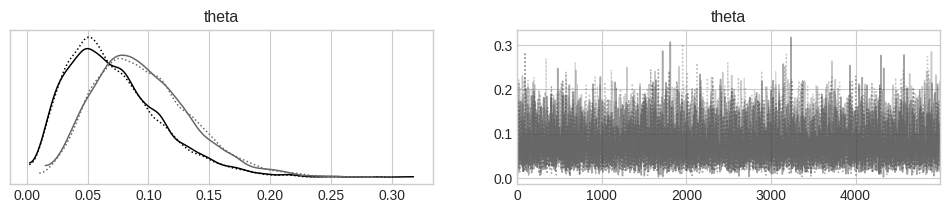

In [10]:
with model:
  pm.plot_trace(trace, ['theta'], compact=True)

<xarray.DataArray 'theta' ()>
array(0.9994)


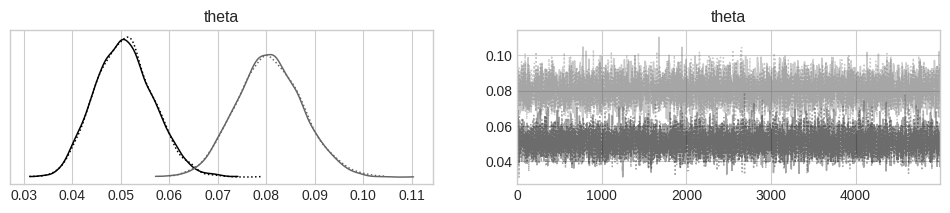

In [11]:
# 旧
# with pm.Model() as model:
#   theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
#   obs = pm.Binomial('obs', p=theta, n=[1280, 1600], observed=[64, 128])
#   trace = pm.sample(5000, chains=2)
#   print((trace['theta'][:, 0] < trace.posterior['theta'][:, 1]).mean())
#   pm.plot_trace(trace, ['theta'], compact=True)

with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
  obs = pm.Binomial('obs', p=theta, n=[1280, 1600], observed=[64, 128])
  trace = pm.sample(5000, chains=2)
  print((trace.posterior['theta'][:, :, 0] < trace.posterior['theta'][:, :, 1]).mean())
  pm.plot_trace(trace, ['theta'], compact=True)

## 真のレビュースコア

In [12]:
n_a = [20, 10, 36, 91, 170]
data = [0 for _ in range(n_a[0])]
data += [1 for _ in range(n_a[1])]
data += [2 for _ in range(n_a[2])]
data += [3 for _ in range(n_a[3])]
data += [4 for _ in range(n_a[4])]

with pm.Model() as model_a:
  theta = pm.Dirichlet('theta', a=np.array([1, 1, 1, 1, 1]))
  obs = pm.Categorical('obs', p=theta, observed=data)
  trace_a = pm.sample(5000, chains=2)

商品Aについて各レビュースコアが生み出される確率 $\boldsymbol{\theta}$ のサンプルの可視化

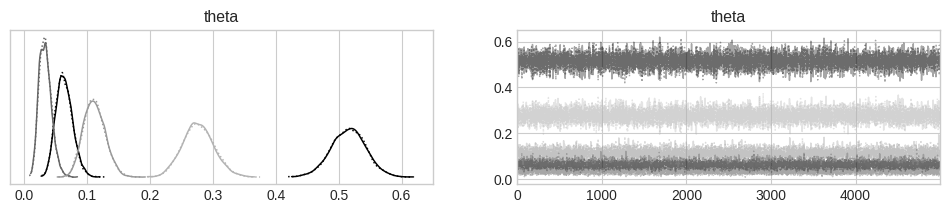

In [13]:
with model_a:
  pm.plot_trace(trace_a)

商品Aについて各レビュースコアが生み出される確率 $\boldsymbol{\theta}$ の事後分布の可視化

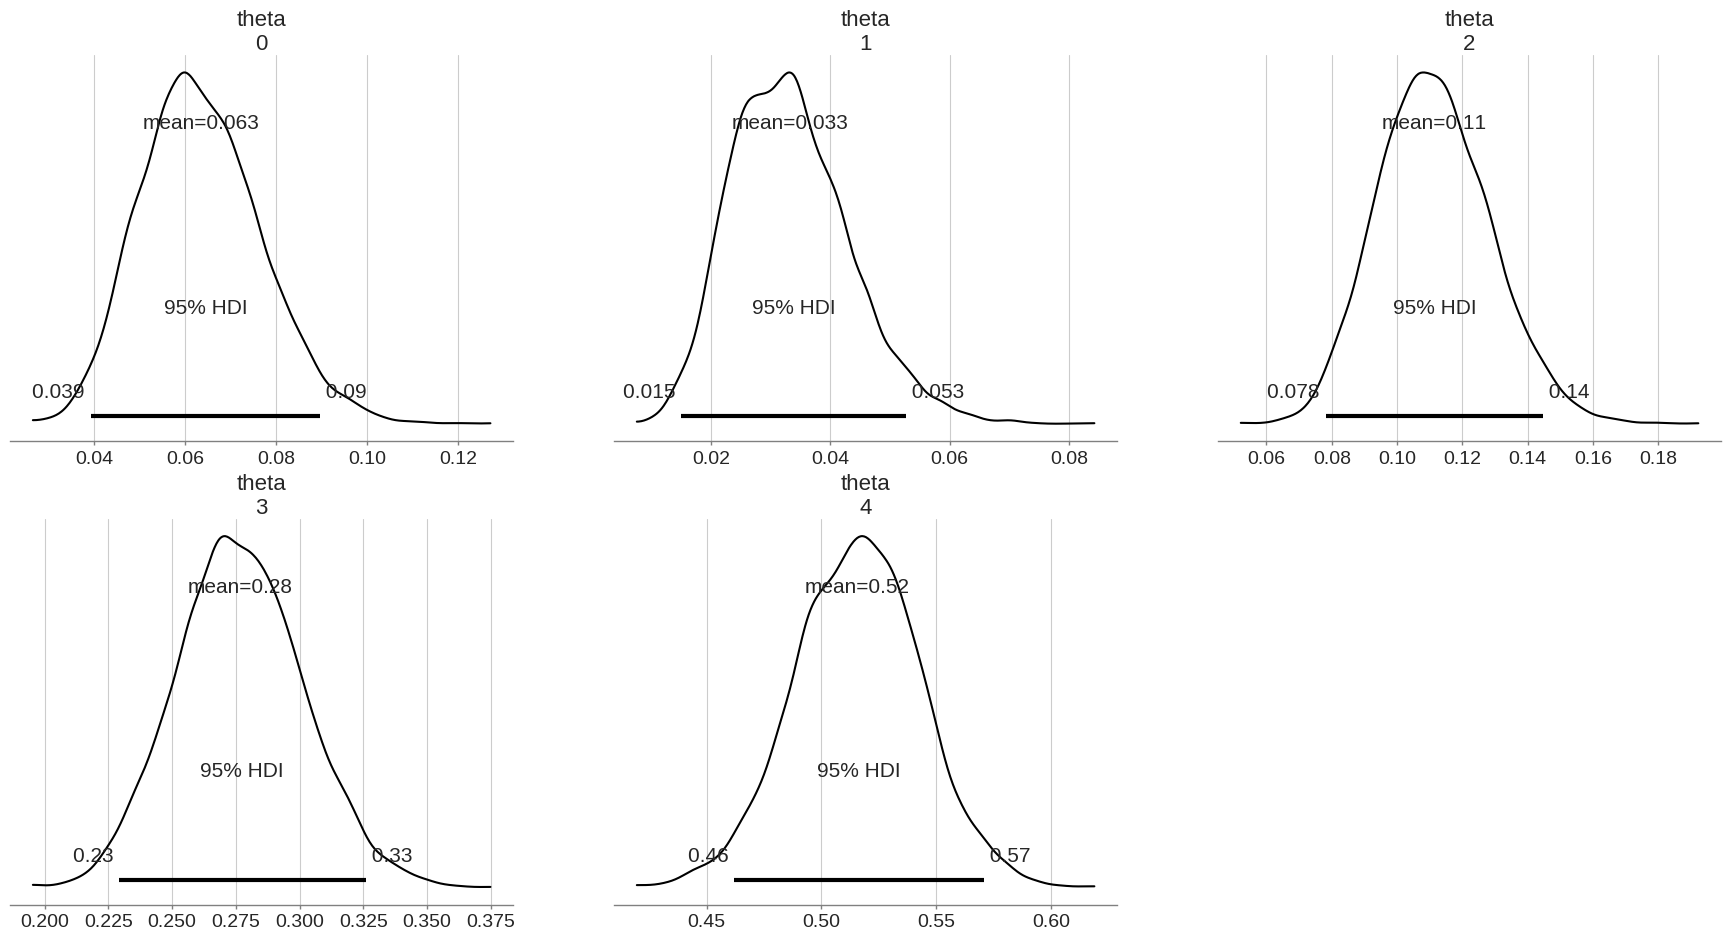

In [14]:
with model_a:
  pm.plot_posterior(trace_a, hdi_prob=0.95)

In [15]:
weights = np.array([1, 2, 3, 4, 5])
m_a = [sum(row * weights) for row in trace_a.posterior['theta'].values[0, :, :]]
#m_a = np.matmul(trace_a['theta'], weights)

商品Aに対するレビュースコアの平均点 $m$ の確率密度関数

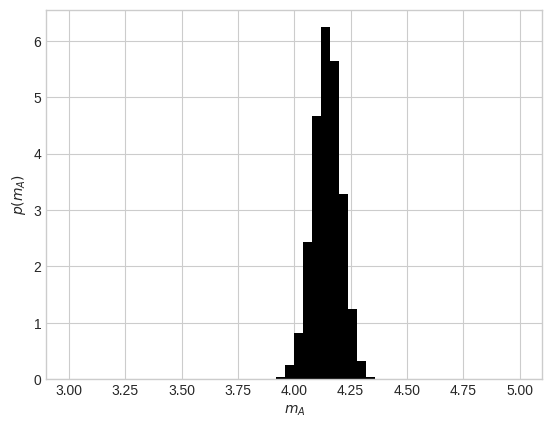

In [16]:
plt.hist(m_a, range=(3, 5), bins=50, density=True)
plt.xlabel(r'$m_A$')
plt.ylabel(r'$p(m_A)$')
plt.show()

商品Bについて各レビュースコアが生み出される確率 $\boldsymbol{\theta}$ のサンプルの可視化


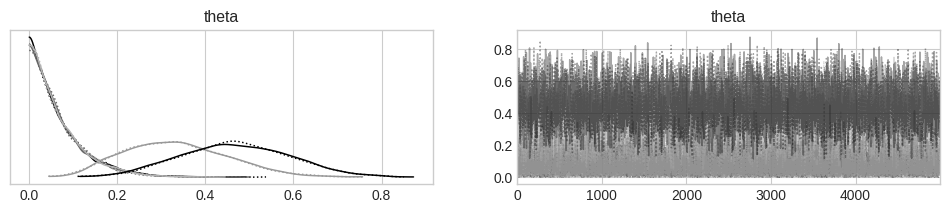

In [17]:
n_b = np.array([0, 0, 4, 0, 6])
with pm.Model() as model_b:
  theta = pm.Dirichlet('theta', a=np.array([1, 1, 1, 1, 1]))
  obs = pm.Multinomial('obs', p=theta, n=n_b.sum(), observed=n_b)
  trace_b = pm.sample(5000, chains=2)
  pm.plot_trace(trace_b)

商品AとBのレビュースコアの平均点の確率密度関数

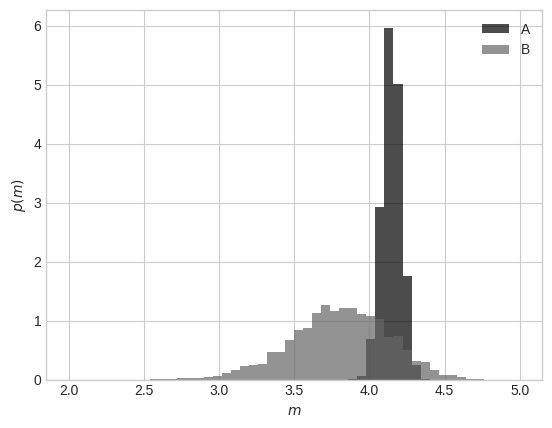

In [18]:
m_b = [sum(row * weights) for row in trace_b.posterior['theta'].values[0, :, :]]
plt.hist(m_a, range=(2, 5), bins=50, density=True, label='A',
         alpha=0.7)
plt.hist(m_b, range=(2, 5), bins=50, density=True, label='B',
         alpha=0.7)
plt.xlabel(r'$m$')
plt.ylabel(r'$p(m)$')
plt.legend()
plt.show()

# 滞在時間をテストする

あるウェブサイトにおける滞在時間（秒）のヒストグラム

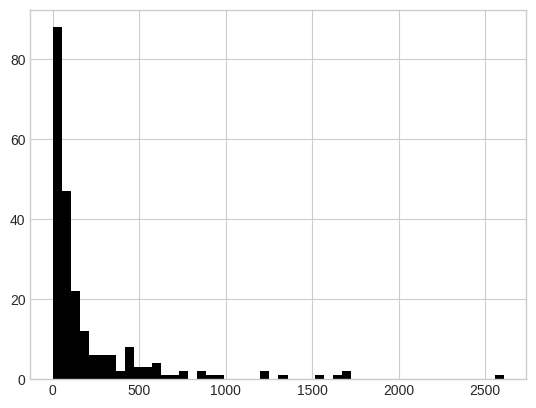

In [19]:
import urllib
url = 'https://www.oreilly.co.jp/pub/9784873119168/data/time-on-page.csv'
response = urllib.request.urlopen(url)
data = [int(row.strip()) for row in response.readlines()]
plt.hist(data, bins=50)
plt.show()

さまざまな指数分布の例

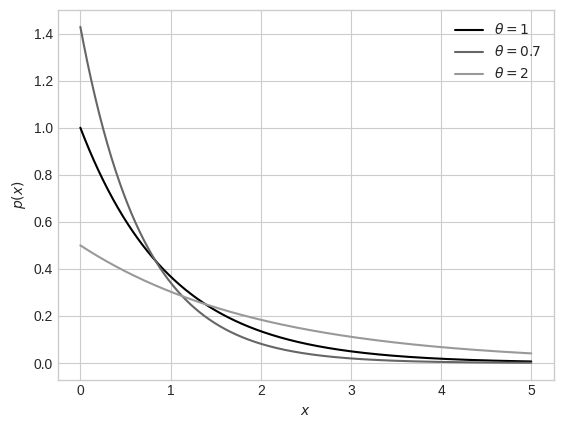

In [20]:
from scipy import stats
xs = np.linspace(0, 5, 1001)
plt.plot(xs, stats.expon.pdf(xs, 0, 1), label=r'$\theta = 1$')
plt.plot(xs, stats.expon.pdf(xs, 0, 0.7), label=r'$\theta = 0.7$')
plt.plot(xs, stats.expon.pdf(xs, 0, 2), label=r'$\theta = 2$')
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.legend()
plt.show()

確率変数 $\theta$ のサンプルの軌跡

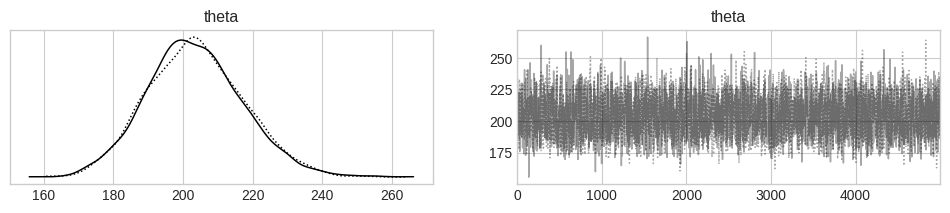

In [21]:
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=3000)
  obs = pm.Exponential('obs', lam=1/theta, observed=data)
  trace = pm.sample(5000, chains=2)
  pm.plot_trace(trace)

確率変数 $\theta$ の事後分布

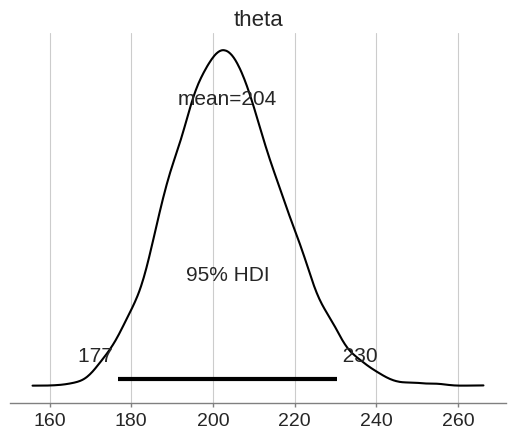

In [22]:
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)

## なぜベイズ推論による統計的仮説検定を行うか

  アリスのレポートにおけるクリック数の標本分布。
  合計クリック数 $a$ が4以上となる部分を異なる色で示した。

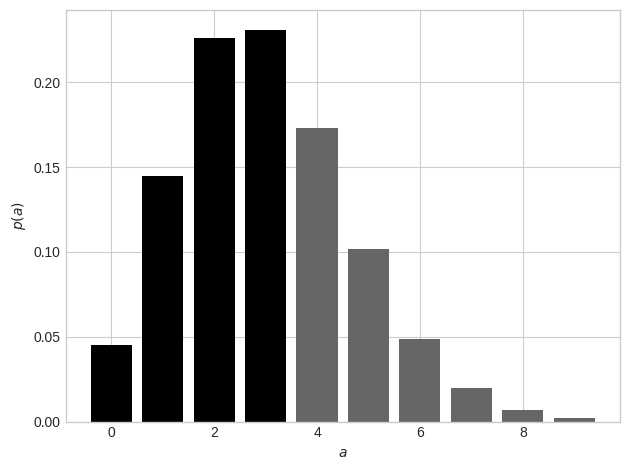

In [23]:
x = 10
N = 50
theta = 0.06
thres = 4
plt.bar(range(thres), stats.binom.pmf(range(thres), N, theta), linewidth=0)
plt.bar(range(thres, x), stats.binom.pmf(range(thres, x), N, theta), linewidth=0)
plt.xlabel(r'$a$')
plt.ylabel(r'$p(a)$')
plt.tight_layout()
plt.show()

$a$ が `thres` 以上の値を取る確率

In [24]:
stats.binom.pmf(range(thres, 10000), N, theta).sum()

0.35269662790368267

ボブのレポートにおけるクリック数の標本分布。合計クリック数 $a$ が128以上となる部分を異なる色で示した。

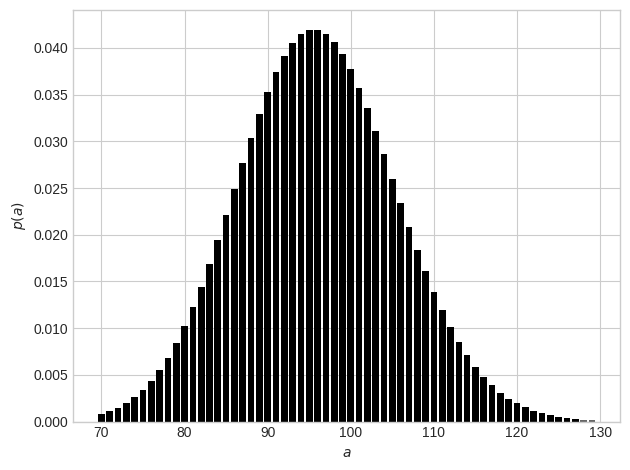

In [25]:
minx = 70
x = 130
N = 1600
theta = 0.06
thres = 128
plt.bar(range(minx, thres), stats.binom.pmf(range(minx, thres), N, theta), linewidth=0)
plt.bar(range(thres, x), stats.binom.pmf(range(thres, x), N, theta), linewidth=0)
plt.xlabel(r'$a$')
plt.ylabel(r'$p(a)$')
plt.tight_layout()
plt.show()

$a$ が `thres` 以上の値を取る確率

In [26]:
stats.binom.pmf(range(thres, 10000), N, theta).sum()

0.0007341521761379321

## 付録： マルコフ連鎖が収束しない例

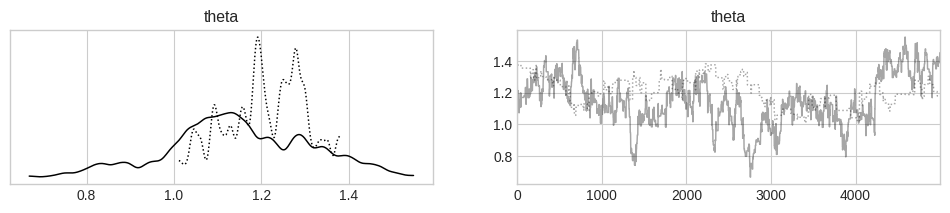

In [27]:
xs = np.random.normal(loc=0.5, scale=0.1, size=100)
ys = np.random.normal(loc=1 * xs+1, scale=0.3)
with pm.Model() as model:
  alpha = pm.Normal('theta', mu=0, sigma=1)
  beta = pm.Normal('beta', mu=0, sigma=1)
  epsilon = pm.Uniform('epsilon', lower=0, upper=1)
  obs = pm.Normal('a', mu=alpha + beta * xs, sigma=epsilon, observed=ys)
  step = pm.Metropolis()
  trace = pm.sample(5000, step=step)
  pm.plot_trace(trace, ['theta'])